# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [370]:
# Parameters
m = 1
A = 0.05#0.1124921875#0.125
run = 1

1

In [371]:
res=m;
N=2.0^m*500.0/2#2.0^m*1000.0;#2.0^m*500.0;#N=2.0^m*500.0#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*500.0/2#100.0*2^m*10
Tf=Nt*dt; #final time
print(Tf)

1.0

In [372]:
print(N)

500.0

In [358]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.0005
dt =0.0005
dx/dt =1.0


In [359]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [360]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [361]:
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
#T=range(0,stop=Tf,step=dt)
println("the time step is ", dt)

step size is  0.0005
the time step is 0.0005


In [362]:
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [363]:
using PyCall   
using Interpolations
using TickTock
using Dierckx

tick()
scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")


####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
"""for i in 4:L-3
    initderpsi[i]=Der(state_array[:,:],i,3,initX)
end

state_array[:,4] = initderpsi
state_array = ghost(state_array)"""

#new
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####


psi_func = Spline1D(initX[4:L-3], state_array[4:L-3,3],  k=4)
derpsi_func = Spline1D(initX[4:L-3], initderpsi[4:L-3],  k=4)#new

funcs = [psi_func, derpsi_func];

tock()

[ Info:  started timer at: 2023-04-09T17:06:40.967
[ Info:          0.356507985s: 356 milliseconds


In [364]:
#BETA
beta0=0
initbeta[4:L-3]=rk4wrapper(SFconstraint_beta,beta0,initX1,0,funcs)
state_array[:,2]=initbeta;
state_array=ghost(state_array);


#M
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,funcs)
state_array[:,1]=initm;
state_array = ghost(state_array);

In [365]:
"""using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])"""

"using Plots #showing initial data and the initial status of the horizon finder\nplot(initX, state_array[:,1:4], xaxis=\"x\",title=\"Initial Data\", labels=[\"m\" \"beta\" \"psi\" \"psi,x\"])"

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [366]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3/time_step0.csv"

In [367]:
timestep=0
criticality=0.0
explode=0.0
evol_stats = [run criticality A sigma r0 timestep explode]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["run", "criticality", "A", "sigma", "r0", "timestep", "explode"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [368]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


 ## Time evolution

fixed grid

In [369]:
finaltime=0.04*5*4#length(T)-1
T_interp = timeevolution(state_array,finaltime,dir,dt,run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);

iteration 10 dt is 0.0004999999999970807, time of iteration is 0.004999999999973728
iteration 20 dt is 0.0004999999999970807, time of iteration is 0.009999999999944536
iteration 30 dt is 0.0004999999999970807, time of iteration is 0.014999999999915345
iteration 40 dt is 0.0004999999999970807, time of iteration is 0.01999999999988614
iteration 50 dt is 0.0004999999999970807, time of iteration is 0.024999999999856932
iteration 60 dt is 0.0004999999999970807, time of iteration is 0.029999999999827724
iteration 70 dt is 0.0004999999999970807, time of iteration is 0.03499999999979852
iteration 80 dt is 0.0004999999999970807, time of iteration is 0.03999999999976931
iteration 90 dt is 0.0004999999999970807, time of iteration is 0.0449999999997401
iteration 100 dt is 0.0004999999999970807, time of iteration is 0.049999999999710894
iteration 110 dt is 0.0004999999999970807, time of iteration is 0.054999999999681685
iteration 120 dt is 0.0004999999999970807, time of iteration is 0.0599999999996

iteration 1000 dt is 0.0004999999999970807, time of iteration is 0.49999999999707434
iteration 1010 dt is 0.0004999999999970807, time of iteration is 0.5049999999970449
iteration 1020 dt is 0.0004999999999970807, time of iteration is 0.5099999999970155
iteration 1030 dt is 0.0004999999999970807, time of iteration is 0.5149999999969861
iteration 1040 dt is 0.0004999999999970807, time of iteration is 0.5199999999969567
iteration 1050 dt is 0.0004999999999970807, time of iteration is 0.5249999999969273
iteration 1060 dt is 0.0004999999999970807, time of iteration is 0.5299999999968978
iteration 1070 dt is 0.0004999999999970807, time of iteration is 0.5349999999968684
iteration 1080 dt is 0.0004999999999970807, time of iteration is 0.539999999996839
iteration 1090 dt is 0.0004999999999970807, time of iteration is 0.5449999999968096
iteration 1100 dt is 0.0004999999999970807, time of iteration is 0.5499999999967802
iteration 1110 dt is 0.0004999999999970807, time of iteration is 0.554999999

 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif")
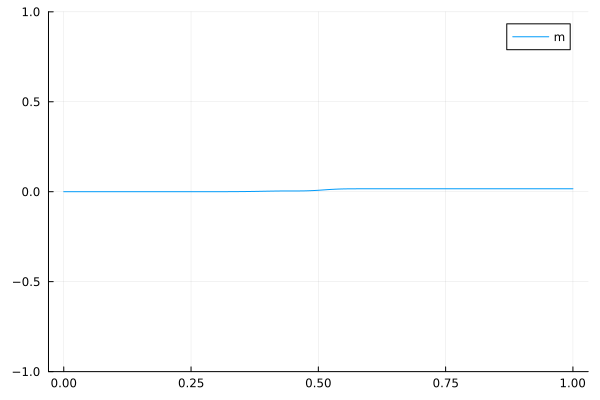

In [322]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:10:100#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    #plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1], xlim=[0, 0.1]) |> display 
    plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1)

In [634]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3"